In [1]:
# filepaths
import os
from os.path import basename

# Regular expressions
import glob
import re

# main modelling
import multiprocessing
import gensim.models.word2vec as w2v

# reduction and display
import sklearn.manifold
import pandas as pd

# plotting data
import matplotlib.pyplot as plt

# debug time output
import time

d:\projects\007-anaconda\envs\tensorflow_gpu\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# -------------------------------------------------------------------------------------------------
# Sentence Text Processing
# -------------------------------------------------------------------------------------------------

def legal_char_for_char(c):
    if   c == '\n': return ' '
    return c

def sentence_to_wordlist(sent):
    cleansent = re.sub("[^a-zA-Z]"," ", sent)
    words = cleansent.split()
    return words

def sentence_end_char(c):
    if   c == '.':  return True
    elif c == '?':  return True
    elif c == '!':  return True
    return False

def mid_sentence_abbr(str):
    if   str.endswith("Mr."): return True
    elif str.endswith("Mrs."): return True
    elif str.endswith("Dr."): return True
    elif str.endswith("Hon."): return True
    elif str.endswith("etc."): return True
    elif str.endswith("ie."): return True
    elif str.endswith("AM."): return True
    elif str.endswith("PM."): return True
    return False

def import_textfile_to_sentencelist(filepath):
    accumulated_sentence = ""
    sentencelist = []
    c = ' '
    with open (filepath, "r") as f:
        while c: 
            c = f.read(1)
            accumulated_sentence += legal_char_for_char(c)

            if ( (sentence_end_char(c)) and not (mid_sentence_abbr(accumulated_sentence)) ):
                sentencelist.append(accumulated_sentence.strip())
                accumulated_sentence = ""

    return sentencelist

In [3]:
# Full inputs of different text types
booklist        = glob.glob("../001-CorpusData/001-Literature/booktext-*.txt")
scriptlist      = glob.glob("../001-CorpusData/004-Dialog/002-Exchanges/*.txt")
specialcaselist = glob.glob("../001-CorpusData/003-MiscWords/specialcase-unk.txt")

# Tailoring of inputs for testing.
booklist        = glob.glob("../001-CorpusData/001-Literature/booktext-Ae*.txt")
scriptlist      = glob.glob("../001-CorpusData/004-Dialog/002-Exchanges/simple*")
specialcaselist = glob.glob("../001-CorpusData/003-MiscWords/specialcase-unk.txt")

# Debug print first entry, make sure we have something in the lists
print(booklist[0])
print(scriptlist[0])
print(specialcaselist[0])

../001-CorpusData/001-Literature\BookText-Aesop-AesopsFables.txt
../001-CorpusData/004-Dialog/002-Exchanges\simpledialog-a.txt
../001-CorpusData/003-MiscWords/specialcase-unk.txt


In [4]:
# Initialise the sentence input / processing
full_sentencelist = []

process_literature = 1
process_scripts    = 1
process_special    = 1

In [5]:
# Input specialcaselist -> full_sentencelist

if process_special:
    # add special case words
    for currsc in specialcaselist:
        print("Processing special case file: {}".format(currsc))
        sentencelist = import_textfile_to_sentencelist(currsc)
        print(len(sentencelist))
        for each in sentencelist:
            eachl = each.lower()
            full_sentencelist.append(eachl)
            print(eachl)

Processing special case file: ../001-CorpusData/003-MiscWords/specialcase-unk.txt
3
unk.
eos.
eol.


In [6]:
# Input booklist -> full_sentencelist

if process_literature:
    # take the book list, and create a list of text sentences
    for currbook in booklist:
        print("Processing text: {}".format(currbook))
        sentencelist = import_textfile_to_sentencelist(currbook)
        for each in sentencelist:
            full_sentencelist.append(each.lower())

Processing text: ../001-CorpusData/001-Literature\BookText-Aesop-AesopsFables.txt


In [7]:
# Input scriptlist -> full_sentencelist

if process_scripts:
    # add script dialog
    for currscript in scriptlist:
        print("Processing script: {}".format(currscript))
        sentencelist = import_textfile_to_sentencelist(currscript)
        for each in sentencelist:
            full_sentencelist.append(each.lower())

Processing script: ../001-CorpusData/004-Dialog/002-Exchanges\simpledialog-a.txt
Processing script: ../001-CorpusData/004-Dialog/002-Exchanges\simpledialog-all.txt
Processing script: ../001-CorpusData/004-Dialog/002-Exchanges\simpledialog-q.txt


In [8]:
# Process full_sentencelist -> list_wordlist

# take the list of sentences, and produce and list of lists of words
list_wordlist = []
print ("NumSentences: {}".format(len(full_sentencelist)))
for each_ts in full_sentencelist:
    words = sentence_to_wordlist(each_ts)
    list_wordlist.append(words)

print (list_wordlist[0:10])

NumSentences: 1831
[['unk'], ['eos'], ['eol'], ['aesop', 's', 'fables', 'aesop', 'embodies', 'an', 'epigram', 'not', 'uncommon', 'in', 'human', 'history', 'his', 'fame', 'is', 'all', 'the', 'more', 'deserved', 'because', 'he', 'never', 'deserved', 'it'], ['the', 'firm', 'foundations', 'of', 'common', 'sense', 'the', 'shrewd', 'shots', 'at', 'uncommon', 'sense', 'that', 'characterise', 'all', 'the', 'fables', 'belong', 'not', 'him', 'but', 'to', 'humanity'], ['in', 'the', 'earliest', 'human', 'history', 'whatever', 'is', 'authentic', 'is', 'universal', 'and', 'whatever', 'is', 'universal', 'is', 'anonymous'], ['in', 'such', 'cases', 'there', 'is', 'always', 'some', 'central', 'man', 'who', 'had', 'first', 'the', 'trouble', 'of', 'collecting', 'them', 'and', 'afterwards', 'the', 'fame', 'of', 'creating', 'them'], ['he', 'had', 'the', 'fame', 'and', 'on', 'the', 'whole', 'he', 'earned', 'the', 'fame'], ['there', 'must', 'have', 'been', 'something', 'great', 'and', 'human', 'something', 'o

In [9]:
print(len(full_sentencelist))

for i in range( min(10, len(full_sentencelist)) ):
    print(full_sentencelist[i])

1831
unk.
eos.
eol.
aesop's fables   aesop embodies an epigram not uncommon in human history; his fame is all the more deserved because he never deserved it.
the firm foundations of common sense, the shrewd shots at uncommon sense, that characterise all the fables, belong not him but to humanity.
in the earliest human history whatever is authentic is universal: and whatever is universal is anonymous.
in such cases there is always some central man who had first the trouble of collecting them, and afterwards the fame of creating them.
he had the fame; and, on the whole, he earned the fame.
there must have been something great and human, something of the human future and the human past, in such a man: even if he only used it to rob the past or deceive the future.
the story of arthur may have been really connected with the most fighting christianity of falling rome or with the most heathen traditions hidden in the hills of wales.


In [10]:
# Number of parallel workers
num_processors = multiprocessing.cpu_count()

# Dimensionality of reesulting vectors
num_features   = 250

# Minimum word count threshold
# The number of times a word has to be present before being added to words2vector.wv.vocab
min_word_count = 1

# The size of the context window determines how many words before and after a given word would be included as 
# context words of the given word. According to the authors note, the recommended value is 10 for skip-gram and 5 for CBOW
context_size = 6

downsampling = 0.001

# Random number seed to be reproducable
seed = 1

In [11]:
words2vector = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_processors,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)
words2vector.build_vocab(list_wordlist)

In [12]:
# Print out some debug
print("cpus: {}".format(num_processors))
print("W2V vocab Length:{}".format(len(words2vector.wv.vocab)) )
total_wordcount = 0
for currsent in list_wordlist:
    total_wordcount += len(currsent)
print("total wordcount:{}".format(total_wordcount))

cpus: 8
W2V vocab Length:4359
total wordcount:41072


In [13]:
# Train the model - Time consuming section
print("Starting opertation: words2vector.train")
t_start = time.time()
words2vector.train(list_wordlist, total_examples=total_wordcount, epochs=words2vector.iter)
t_end = time.time()
print("ElapsedTime: {0:.1f} seconds".format(t_end-t_start))

Starting opertation: words2vector.train
ElapsedTime: 0.3 seconds


In [14]:
# Check words are present to lookup before moving on
print("Num words in vocab : {}\n".format(len(words2vector.wv.vocab)))
print(words2vector['unk'])

Num words in vocab : 4359

[-1.22662284e-03 -8.19806533e-04  2.90213560e-04 -1.85868726e-03
  1.22275762e-03  1.38269668e-03  5.50346216e-04 -1.04607467e-03
 -1.99666130e-03 -6.06355141e-04 -1.48056541e-04 -1.45653286e-03
  2.37584769e-04 -8.46329553e-04  1.54590327e-03 -9.64645937e-04
 -3.44603613e-04 -8.81500950e-04 -7.71556690e-04 -1.32481183e-03
  8.14994040e-04 -1.53175544e-03  9.82747413e-04  1.28194329e-03
 -1.17890956e-03 -1.57955650e-03 -3.59795464e-04 -1.55008293e-03
  3.45420209e-04 -8.93178571e-04 -1.61939138e-03 -9.65867715e-04
 -1.77945464e-03 -1.45512028e-03  1.70063495e-03 -2.61178386e-04
 -1.91889820e-03  1.31285249e-03 -1.61963585e-03 -1.97295193e-03
  1.21379900e-03 -1.14387576e-03  1.88533682e-03 -1.80968747e-03
 -1.77448848e-03 -6.95714320e-04 -1.86589186e-03 -7.75757129e-04
 -1.98554993e-03  1.62050175e-03 -1.60520396e-03 -1.21504895e-03
 -1.00391987e-03 -1.97588908e-03  5.96908678e-04 -1.30859751e-03
 -1.39550434e-03  1.56635710e-03  1.48277229e-03 -6.75574003e-0

In [15]:
words2vector.save("fullw2v_d250_v4359.w2v")

In [16]:
# Reduce word vector to a displayable 2D array
print("Starting operation: sklearn.manifold.TSNE")
t_start = time.time()
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = words2vector.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
t_end = time.time()
print("ElapsedTime: {0:.1f} seconds".format(t_end-t_start))

Starting operation: sklearn.manifold.TSNE
ElapsedTime: 74.1 seconds


In [17]:
# Display the W2V 2D representation
df = pd.DataFrame(
[
    (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[words2vector.wv.vocab[word].index])
            for word in words2vector.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
print ( df.head(10) )

       word          x          y
0       unk  -1.989357  62.357449
1       eos  -1.993485  62.358334
2       eol  -1.893111  62.828960
3     aesop -68.381844 -36.605442
4         s -55.471905  34.169071
5    fables -61.949097 -26.563698
6  embodies  18.475626  44.978504
7        an -40.891205  53.043053
8   epigram  21.325926  40.727413
9       not -71.616806 -34.869030


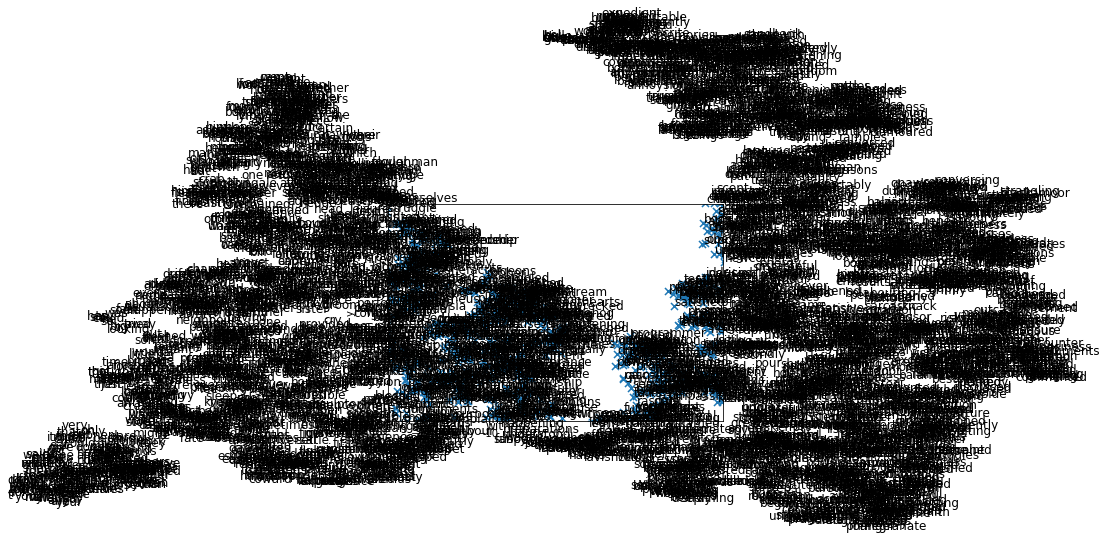

In [18]:
df.plot.scatter(x='x', y='y', s=50, marker='x')

plotXOffset = 0.15
plotYOffset = 0.04
for k, v in df.iterrows():
    word = v[0]
    x = v[1]
    y = v[2]
    plt.text(x+plotXOffset, y+plotYOffset , word, fontsize=12)

plt.xlim((-25, 25))
plt.ylim((-25, 25))
plt.show()